# A model of investor sentiment

Imports and set magics:

In [ ]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import qConvergence

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Numerical solution

In [ ]:
from qConvergence import InvestorForecast
model = InvestorForecast()
par = model.par
np.random.seed(2000)
state = np.random.get_state()

**Investor's forecast**

_Proof of concept_

In [4]:
print(f'Probability that model 1 governs earnings in period t+1 when two identical shocks hit (y_t>0): {model.forecast(1,1,par.q_ini):.4f}')
print(f'Probability that model 1 governs earnings in period t+1 when two oppostite shocks hit (y_t>0): {model.forecast(1,-1,par.q_ini):.4f}')
print(f'Probability that model 1 governs earnings in period t+1 when two identical shocks hit (y_t<0): {model.forecast(-1,-1,par.q_ini):.4f}')
print(f'Probability that model 1 governs earnings in period t+1 when two oppostite shocks hit (y_t<0): {model.forecast(-1,1,par.q_ini):.4f}')

Probability that model 1 governs earnings in period t+1 when two identical shocks hit (y_t>0): 0.4386
Probability that model 1 governs earnings in period t+1 when two oppostite shocks hit (y_t>0): 0.6980
Probability that model 1 governs earnings in period t+1 when two identical shocks hit (y_t<0): 0.1516
Probability that model 1 governs earnings in period t+1 when two oppostite shocks hit (y_t<0): 0.6561


**Convergence given consecutive shocks with same sign**

In the following, $q_{t+1}$ will be saved as _q_ for the consecutive period.

Iteration	q		new_q
1		0.500000	0.438609	0.519500
2		0.438609	0.447659	0.528647
3		0.447659	0.446322	0.527299
4		0.446322	0.446519	0.527498
5		0.446519	0.446490	0.527469
6		0.446490	0.446494	0.527473
7		0.446494	0.446494	0.527472


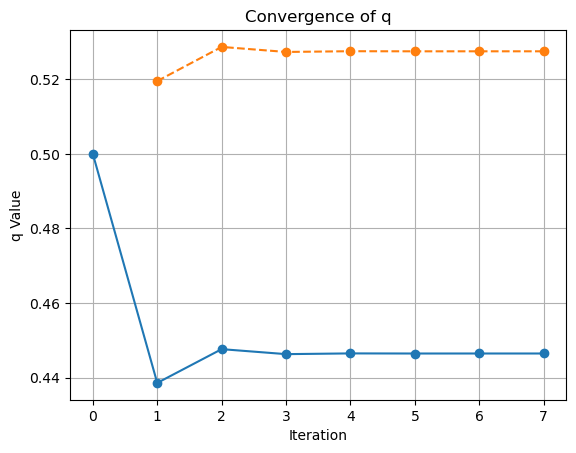

In [5]:
model.convergence(1,1);

**Convergence given consecutive alternating shocks**

Iteration	q		new_q
1		0.500000	0.698001	0.519500
2		0.698001	0.672550	0.489998
3		0.672550	0.675883	0.493790
4		0.675883	0.675448	0.493293
5		0.675448	0.675504	0.493358
6		0.675504	0.675497	0.493350
7		0.675497	0.675498	0.493351


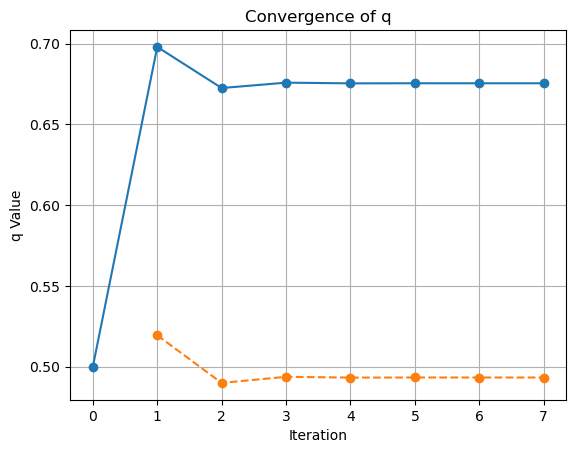

In [6]:
model.convergence(1,-1);

Iteration	q		new_q
1		0.500000	0.151598	0.519500
2		0.151598	0.180561	0.571412
3		0.180561	0.177972	0.567096
4		0.177972	0.178202	0.567482
5		0.178202	0.178182	0.567448
6		0.178182	0.178183	0.567451
7		0.178183	0.178183	0.567451


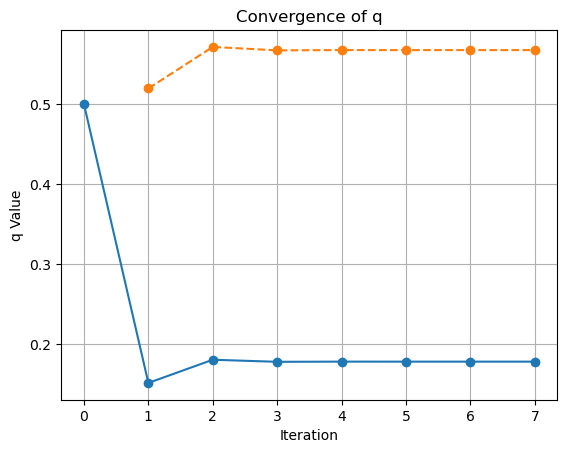

In [7]:
model.convergence(-1,-1);

Iteration	q		new_q
1		0.500000	0.656071	0.519500
2		0.656071	0.634779	0.496245
3		0.634779	0.637716	0.499418
4		0.637716	0.637311	0.498980
5		0.637311	0.637367	0.499041
6		0.637367	0.637359	0.499032
7		0.637359	0.637361	0.499033
8		0.637361	0.637360	0.499033


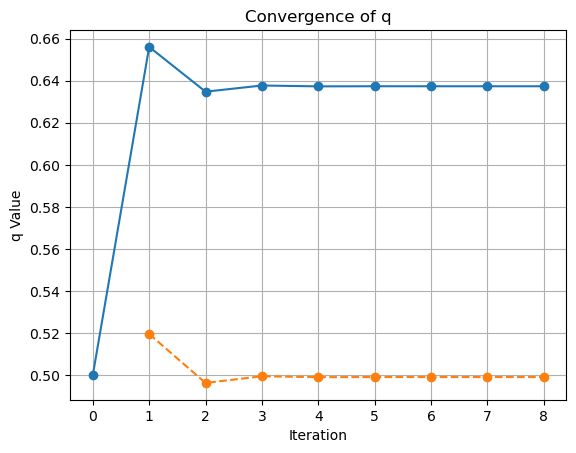

In [8]:
model.convergence(-1,1);

Given the initial parameters and consecutive alternating shocks to $y_t$, investor will believe model 1 governs earnings at probability 0.62 after 8 periods

**Plot of the first 50 periods with randomly distributed shocks**

Period  1: old_y =  1, new_y = -1, q = 0.70
Period  2: old_y = -1, new_y = -1, q = 0.14
Period  3: old_y = -1, new_y = -1, q = 0.18
Period  4: old_y = -1, new_y =  1, q = 0.70
Period  5: old_y =  1, new_y = -1, q = 0.67
Period  6: old_y = -1, new_y =  1, q = 0.63
Period  7: old_y =  1, new_y = -1, q = 0.68
Period  8: old_y = -1, new_y = -1, q = 0.14
Period  9: old_y = -1, new_y = -1, q = 0.18
Period 10: old_y = -1, new_y = -1, q = 0.18
Period 11: old_y = -1, new_y =  1, q = 0.70
Period 12: old_y =  1, new_y = -1, q = 0.67
Period 13: old_y = -1, new_y = -1, q = 0.14
Period 14: old_y = -1, new_y =  1, q = 0.70
Period 15: old_y =  1, new_y =  1, q = 0.41
Period 16: old_y =  1, new_y = -1, q = 0.71
Period 17: old_y = -1, new_y =  1, q = 0.63
Period 18: old_y =  1, new_y =  1, q = 0.42
Period 19: old_y =  1, new_y = -1, q = 0.71
Period 20: old_y = -1, new_y = -1, q = 0.14
Period 21: old_y = -1, new_y = -1, q = 0.18
Period 22: old_y = -1, new_y =  1, q = 0.70
Period 23: old_y =  1, new_y =  

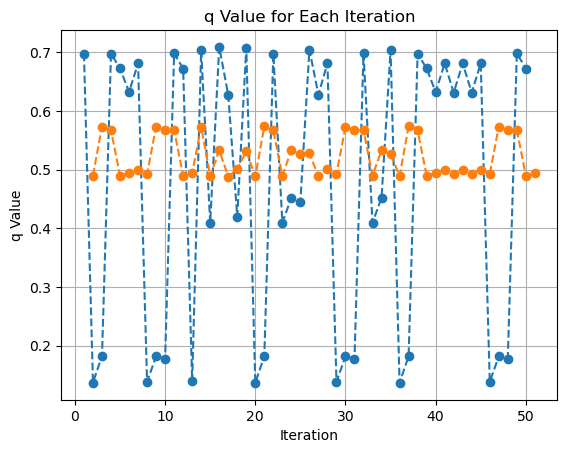

In [9]:
n = 50  # Number of periods
np.random.set_state(state)
ini_sim = model.simulate(n)